In [134]:
import math
import sklearn
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import os

499
3034


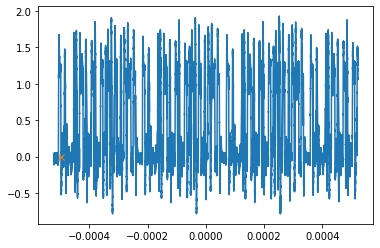

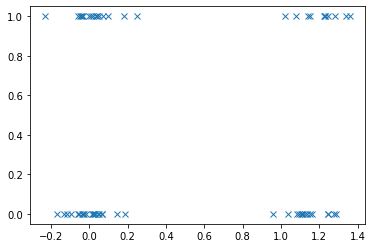

In [196]:
# -- Import data --

fname = "Data/MEAS_4.CSV"

ts, vs = np.loadtxt(fname, delimiter=',', skiprows=1, usecols=(0, 1)).transpose()


res = ts[1] - ts[0] # time resolution in s per time step
bit_len = int(float(fname.strip(".CSV").strip("Data/MEAS_").replace('-', '.'))*1e-6/res) # time steps per bit
print(bit_len)

# Training data y
y = np.array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

plt.plot(ts, vs)

nbits = len(y)
thresh = 1 # threshold between 0 and 1
start = 0 # initialise start variable

# Find starting point of one pattern
for i, t in enumerate(ts):
    if vs[i] <= thresh and vs[i + bit_len] <= thresh and vs[i + 2*bit_len] <= thresh and vs[i + 3*bit_len] <= thresh and vs[i + 4*bit_len] <= thresh and vs[i + 5*bit_len] <= thresh and vs[i + round(6.5*bit_len)] <= thresh:
        print(i)
        start = t
        break

# Cut out one pattern
for i, t in enumerate(ts):
    if t >= start and vs[i] >= thresh:
        ts = ts[i:]
        vs = vs[i:]
        break

# Plot data
lim1 = 0
lim2 = 20000

#plt.plot(ts[lim1:lim2], vs[lim1:lim2])
plt.plot(start, 0, 'x')
plt.show()

# Split data in to intervals containing bits
intervals = []
for i in range(nbits+2):
    intervals.append([vs[bit_len*i + n] for n in range(bit_len)])
intervals = intervals[2:]

X = np.array([np.mean(interval) for interval in intervals])
#print(list(zip(X, y))) # matching mean to bit values

#n = 2
#plt.plot(np.arange(0, len(intervals[n])), intervals[n])
#plt.show()

plt.plot(X, y, 'x')
plt.show()

In [131]:
# -- Train machine learning model --

clf = svm.SVC(kernel="linear", C=2)
clf.fit(X.reshape(-1, 1), y)

SVC(C=2, kernel='linear')

In [132]:
# -- Identify bits --

bits = clf.predict(X.reshape(-1, 1))

print(bits)
print(len(bits))
acc = sum([bits[i] == y[i] for i in range(len(bits))])/len(bits)
print(f"Accuracy: {acc}")

[1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0
 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1]
63
Accuracy: 1.0


In [133]:
# -- Decode ASCII characters --

# Test case

def decode(bits):
    if len(bits)%7 != 0:
        return "Decoding error: Not ASCII sequence."
    bit_strings = []
    for i in range(int(len(bits)/7)):
        bit_string = ''.join([str(bits[7*i + n]) for n in range(7)])
        bit_strings.append(bit_string)
    
    letters = []
    for bitstr in bit_strings:
        num = int('0b' + bitstr, 2)
        letters.append(chr(num))

    return ''.join(letters)
msg = decode(bits)

print(f"Decoded message: {msg}")


Decoded message: N!PeS	\`1


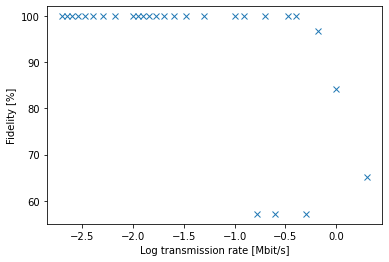

In [193]:
y = np.array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])
periods = []
accs = []


for file in os.listdir("Data/"):
    fname = os.fsdecode(file)
    if fname.endswith(".CSV"):
        ts, vs = np.loadtxt(f"Data/{fname}", delimiter=',', skiprows=1, usecols=(0, 1)).transpose()

        period = float(fname.strip(".CSV").strip("MEAS_").replace('-', '.'))

        res = ts[1] - ts[0] # time resolution in s per time step
        bit_len = int(period*1e-6/res) # time steps per bit

        nbits = len(y)
        thresh = 0.4 if period != 2.5 else 0.6 # threshold between 0 and 1
        start = 0 # initialise start variable

        # Find starting point of one pattern
        for i, t in enumerate(ts):
            if vs[i] <= thresh and vs[i + bit_len] <= thresh and vs[i + 2*bit_len] <= thresh and vs[i + 3*bit_len] <= thresh and vs[i + 4*bit_len] <= thresh and vs[i + 5*bit_len] <= thresh and vs[i + round(6.5*bit_len)] <= thresh:
                start = t
                break

        # Cut out one pattern
        for i, t in enumerate(ts):
            if t >= start and vs[i] >= thresh:
                ts = ts[i:]
                vs = vs[i:]
                break

        # Split data in to intervals containing bits
        intervals = []
        for i in range(nbits+2):
            intervals.append([vs[bit_len*i + n] for n in range(bit_len)])
        intervals = intervals[2:]

        X = np.array([np.mean(interval) for interval in intervals])

        #plt.title(fname)
        #plt.plot(X, y, 'x')
        #plt.show()

        clf = svm.SVC(kernel="linear", C=2)
        clf.fit(X.reshape(-1, 1), y)
        bits = clf.predict(X.reshape(-1, 1))

        acc = sum([bits[i] == y[i] for i in range(len(bits))])/len(bits)

        periods.append(float(fname.strip(".CSV").strip("MEAS_").replace('-', '.')))
        accs.append(acc)

plt.plot(-np.log10(np.array(periods)), 100*np.array(accs), "x")
plt.xlabel("Log transmission rate [Mbit/s]")
plt.ylabel("Fidelity [%]")
plt.show()